# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
# plt.style.use('seaborn-whitegrid')
# sns.set_palette('viridis')
# %matplotlib inline

# For 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# For PCA in multivariate analysis
from sklearn.decomposition import PCA

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [8]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [9]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [13]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here

# Ensure the 'Year' column is in proper datetime format and then extract the year
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

# Aggregate the data by year by computing the average for each climate variable
df_yearly = df.groupby('Year').mean().reset_index()
df_yearly.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.


Descriptive statistics for Global Average Temperature (°C):
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64
Mean: 14.499538014059075
Median: 14.499496271190523


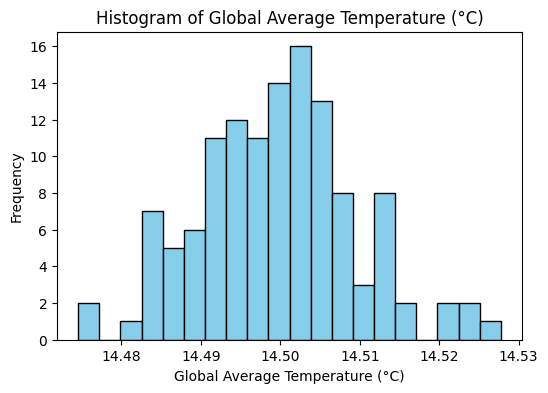

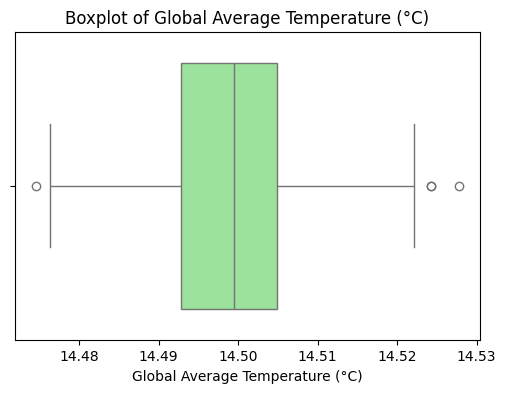

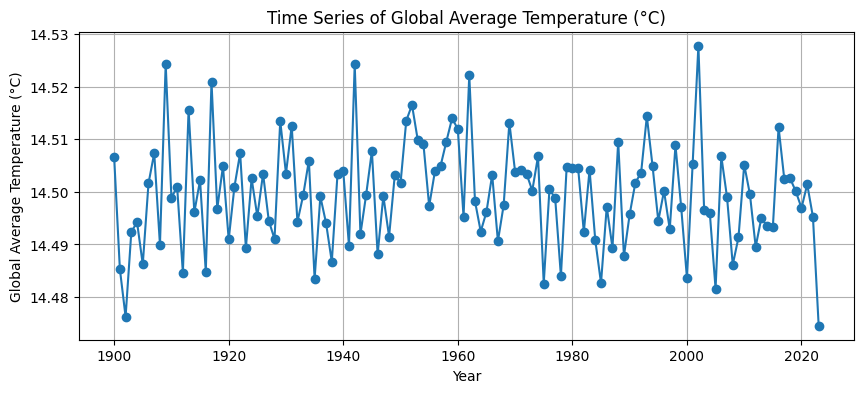


Descriptive statistics for CO2 Concentration (ppm):
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64
Mean: 350.0286255575196
Median: 350.02233369847306


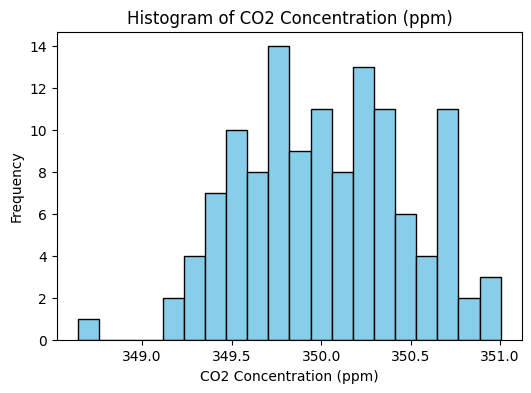

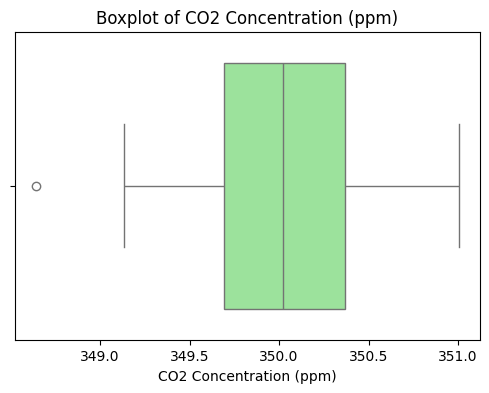

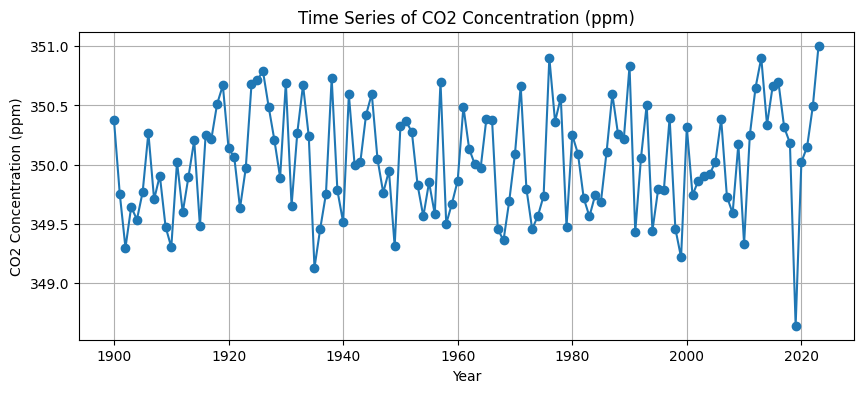


Descriptive statistics for Sea Level Rise (mm):
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64
Mean: 149.9888585272557
Median: 149.91806245822556


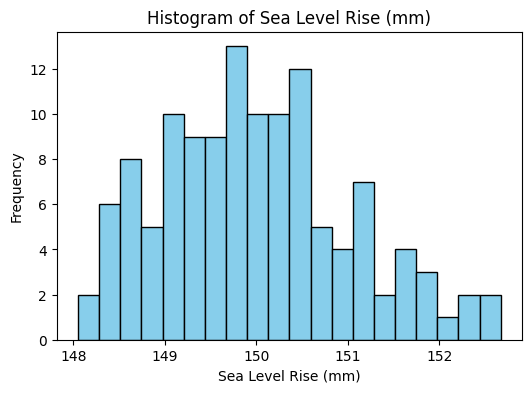

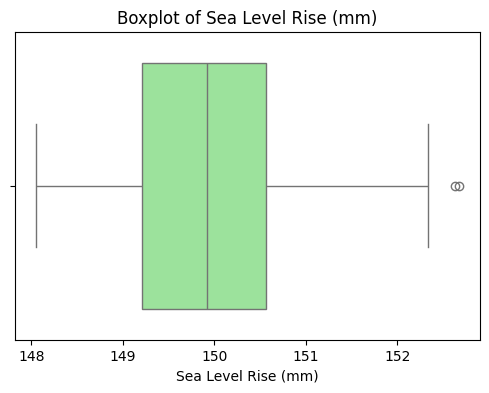

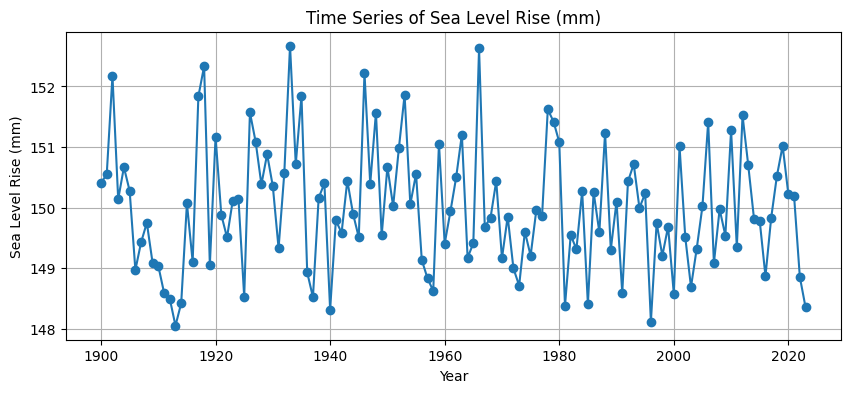


Descriptive statistics for Arctic Ice Area (million km²):
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64
Mean: 9.000885689000027
Median: 8.998274441362046


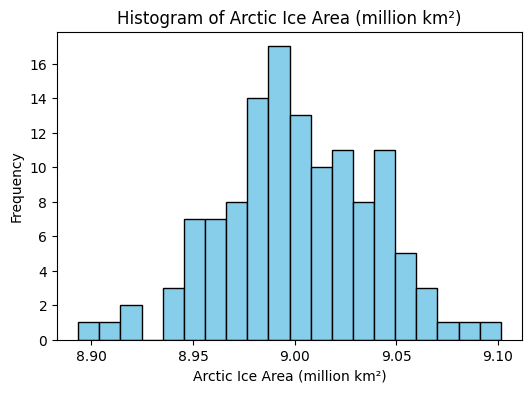

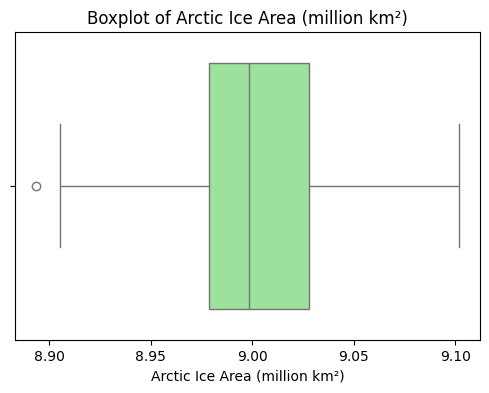

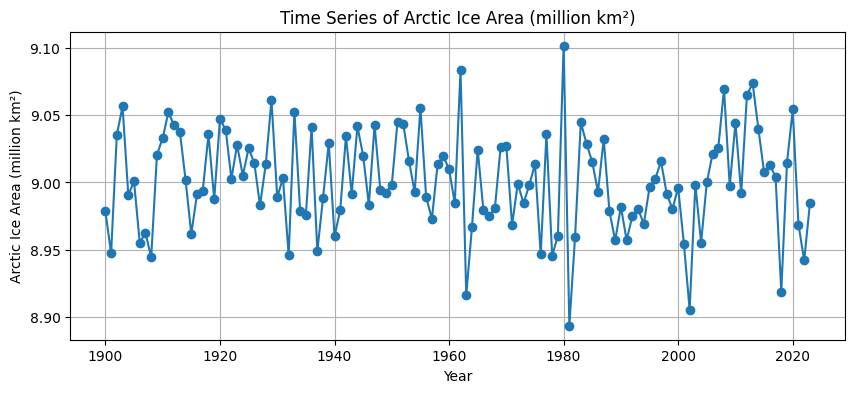

In [14]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

climate_vars = ['Global Average Temperature (°C)', 'CO2 Concentration (ppm)', 'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']

for var in climate_vars:
    print(f"\nDescriptive statistics for {var}:")
    print(df_yearly[var].describe())
    print(f"Mean: {df_yearly[var].mean()}")
    print(f"Median: {df_yearly[var].median()}")

    # Histogram
    plt.figure(figsize=(6,4))
    plt.hist(df_yearly[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_yearly[var], color='lightgreen')
    plt.title(f"Boxplot of {var}")
    plt.xlabel(var)
    plt.show()

    # Time Series Plot
    plt.figure(figsize=(10,4))
    plt.plot(df_yearly['Year'], df_yearly[var], marker='o', linestyle='-')
    plt.title(f"Time Series of {var}")
    plt.xlabel('Year')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

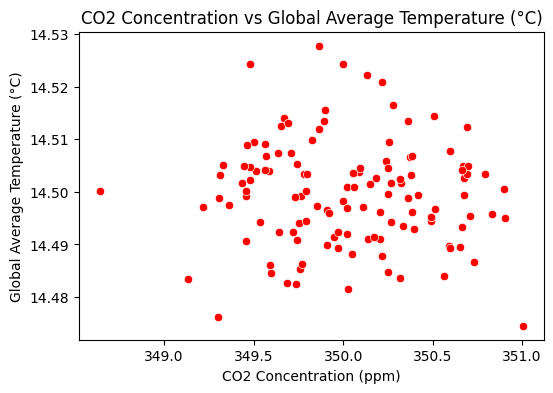

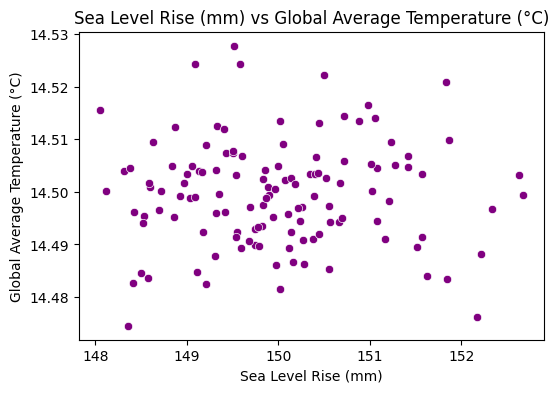

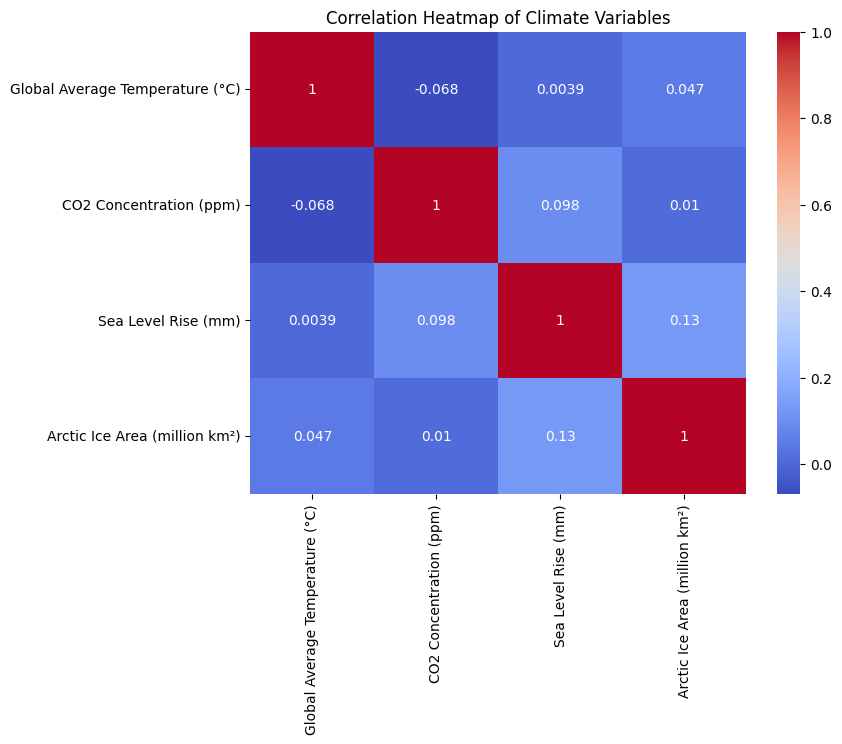

In [15]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

# Scatter plot: CO2 Concentration vs Global Average Temperature
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_yearly, x='CO2 Concentration (ppm)', y='Global Average Temperature (°C)', color='red')
plt.title('CO2 Concentration vs Global Average Temperature (°C)')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Global Average Temperature (°C)')
plt.show()

# Scatter plot: Sea Level Rise vs Global Average Temperature
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_yearly, x='Sea Level Rise (mm)', y='Global Average Temperature (°C)', color='purple')
plt.title('Sea Level Rise (mm) vs Global Average Temperature (°C)')
plt.xlabel('Sea Level Rise (mm)')
plt.ylabel('Global Average Temperature (°C)')
plt.show()

# Correlation Heatmap for climate variables
plt.figure(figsize=(8,6))
corr = df_yearly[climate_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Climate Variables')
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

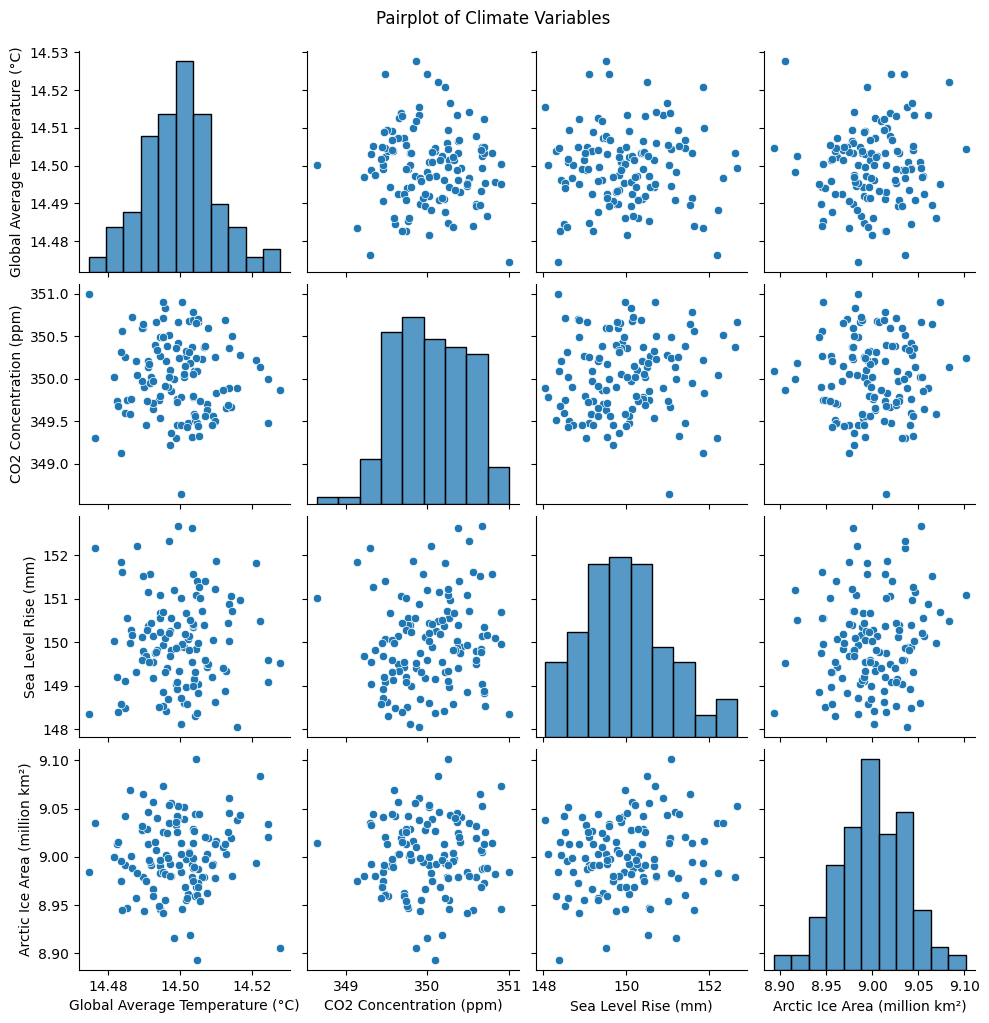

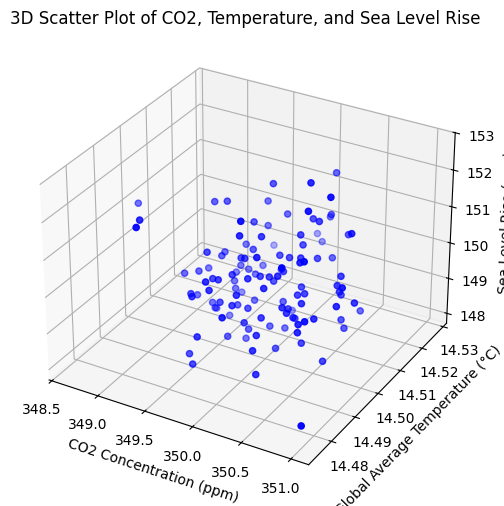

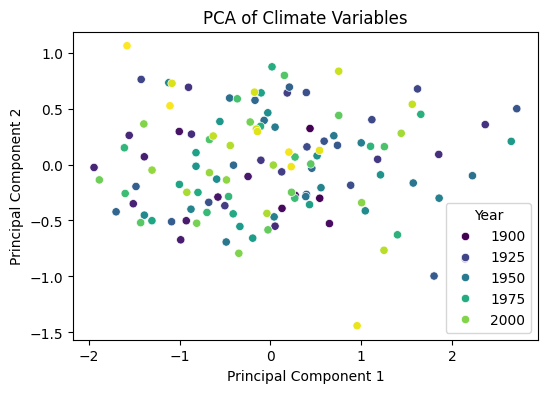

In [18]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

# Pairplot of all climate variables
sns.pairplot(df_yearly[climate_vars])
plt.suptitle('Pairplot of Climate Variables', y=1.02)
plt.show()

# 3D Scatter Plot for CO2, Global Average Temperature, and Sea Level Rise
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_yearly['CO2 Concentration (ppm)'], df_yearly['Global Average Temperature (°C)'], df_yearly['Sea Level Rise (mm)'], c='blue', marker='o')
ax.set_xlabel('CO2 Concentration (ppm)')
ax.set_ylabel('Global Average Temperature (°C)')
ax.set_zlabel('Sea Level Rise (mm)')
plt.title('3D Scatter Plot of CO2, Temperature, and Sea Level Rise')
plt.show()

# PCA for dimensionality reduction of climate variables
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_yearly[climate_vars])
plt.figure(figsize=(6,4))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df_yearly['Year'], palette='viridis')
plt.title('PCA of Climate Variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

Based on the exploratory data analysis performed on the climate dataset, several key findings emerge:

- **Global Average Temperature (°C):** The time series plot shows a clear trend over the years, suggesting a gradual increase.
- **CO2 Concentration (ppm):** There is a significant upward trend in CO2 levels, which correlates with increasing global temperatures.
- **Sea Level Rise (mm):** Although there is some variability, the overall trend indicates rising sea levels over time.
- **Arctic Ice Area (million km²):** A declining trend is observed, reflecting the potential impact of global warming on polar regions.

These insights underscore the interconnected nature of climate indicators. Further investigation into causative factors and future projections is recommended to better understand the implications of these trends.